
# Building a Network from Wikipedia Pages

* [Pipeline to extract a network from Wikipedia.](https://github.com/VictorNGomes/Directed_Networks_From_Wikipedia_Pages/blob/main/notebooks/Pipeline.ipynb )

* [Week 07 Video 01 - Building a Network from Wikipedia Pages](https://youtu.be/EhOhCdkgmxs)

* [Week 07 Video 02 - Snowballing process to collect Wikipedia pages](https://youtu.be/RdU6Kj9N_ow)

In [2]:
!pip install wikipedia
     

from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns
     

nx.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'2.6.2'

In [2]:
#!pip install scipy==1.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [3]:
SEED = "Complex network".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")
     

In [4]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [5]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [6]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]
     

print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))
     

0 Complex Network
1 Adjacency List
1 Adjacency Matrix
1 Agent-Based Model
1 Albert-László Barabási
1 Artificial Neural Network
1 Assortativity
1 Autonomous System (Internet)
1 Balance Theory
1 Barabási–Albert Model
1 Bianconi–Barabási Model
1 Biological Network
1 Biology
1 Bipartite Graph
1 Blockmodeling
Could not load Blockmodeling
1 Boolean Network
1 Branching Process
1 Centrality
1 Climate
1 Climate Networks
1 Clique (Graph Theory)
1 Clustering Coefficient
1 Combinatorial Optimization
1 Community Structure
1 Complete Graph
1 Complex Networks
1 Complex Adaptive System
1 Complex Contagion
1 Complex Systems
1 Computer Network
1 Computer Science
1 Connected Component (Graph Theory)
1 Connectome
Could not load Connectome
1 Cut (Graph Theory)
1 Cycle (Graph Theory)
1 Degree (Graph Theory)
1 Degree Distribution
1 Dependency Network
1 Directed Graph
1 Distance (Graph Theory)
1 Dual-Phase Evolution
1 Duncan J. Watts
1 Dynamic Network Analysis
1 Edge (Graph Theory)
1 Efficiency (Network Scien

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Physics
1 Poisson Distribution
Could not load Poisson Distribution
1 Power-Law
1 Power Law
1 Preferential Attachment
1 Random Geometric Graph
1 Random Graph
1 Random Graph Theory Of Gelation
1 Random Regular Graphs
1 Reciprocity (Network Science)
1 Reciprocity In Network
1 Regular Lattices
Could not load Regular Lattices
1 S2Cid (Identifier)
1 Sir Model
1 Scale-Free Network
1 Scale-Free Networks
1 Scientific Collaboration Network
1 Semantic Network
1 Six Degrees Of Separation
1 Small-World Network
1 Small-World Networks
1 Small-World Phenomenon
1 Small World Networks
1 Social Capital
1 Social Influence
1 Social Network
1 Social Network Analysis Software
1 Sociology
1 Soft Configuration Model
1 Spatial Network
1 Stanley Milgram
1 Steven Strogatz
1 Stochastic Block Model
1 Telecommunications Network
1 Topological
1 Transitive Relation
1 Transport Network
1 Triadic Closure
1 Trophic Coherence
1 Vertex (Graph Theory)
1 Watts–Strogatz Model
1 Weighted Graph
Could not load Wei

In [7]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

13900 nodes, 26251 edges


In [8]:

page = 'Complex network'.title()
wiki = wikipedia.page(page)
len(wiki.links)

144

In [9]:
# make a copy of raw graph
original = g.copy()

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")
     
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

[('Complex Network', 'Complex Networks'), ('Computer Science', 'Computer Sciences'), ('Random Graph', 'Random Graphs'), ('Scale-Free Network', 'Scale-Free Networks'), ('Semantic Network', 'Semantic Networks'), ('Small-World Network', 'Small-World Networks'), ('Social Network', 'Social Networks'), ('Spatial Network', 'Spatial Networks'), ('Graph Database', 'Graph Databases'), ('Data Structure', 'Data Structures'), ('Eigenvector', 'Eigenvectors'), ('Ant Colony Optimization Algorithm', 'Ant Colony Optimization Algorithms'), ('Complex System', 'Complex Systems'), ('Multi-Agent System', 'Multi-Agent Systems'), ('Social Science', 'Social Sciences'), ('Artificial Neuron', 'Artificial Neurons'), ('Automated Lane Keeping System', 'Automated Lane Keeping Systems'), ('Hyperparameter', 'Hyperparameters'), ('Multilayer Perceptron', 'Multilayer Perceptrons'), ('Partial Differential Equation', 'Partial Differential Equations'), ('Probability Distribution', 'Probability Distributions'), ('Recurrent Ne

In [12]:
degree = [drg for node , drg in g.degree()]
print(f'Max degree : {max(degree)}' )
print(f'Min degree : {min(degree)}' )

Max degree : 1181
Min degree : 1


<Axes: ylabel='Count'>

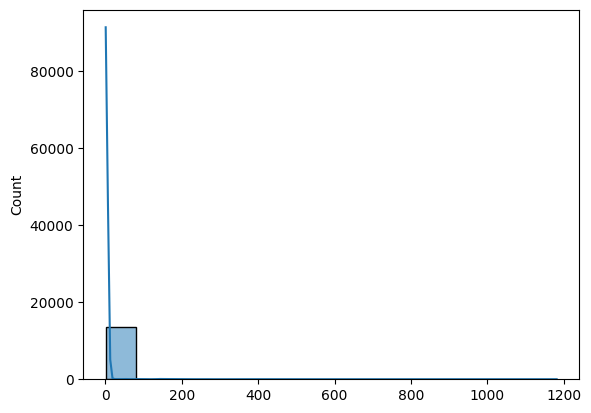

In [13]:
sns.histplot(data=degree, kde=True)

In [20]:
#filter nodes with degree greater than 2
#core decompo = 3 
core = [node for node, drg in dict(g.degree()).items() if drg > 2 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 2 ]

In [15]:
subgraf_g = nx.subgraph(g,core)
print(f'Nodes: {len(subgraf_g)} edges: {nx.number_of_edges(subgraf_g)}')
nx.write_graphml(subgraf_g, "network_analysis.graphml")

Nodes: 1490 edges: 10851


In [25]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(subgraf_g)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(subgraf_g)/nx.number_of_edges(g))))
print("Original Average of edges by node: {:.2f}".format(nx.number_of_edges(g)/len(g)))
print("Subgraph Average of edges by node: {:.2f}".format(nx.number_of_edges(subgraf_g)/len(subgraf_g)))

Nodes removed: 89.19%
Edges removed: 56.56%
Original Average of edges by node: 1.81
Subgraph Average of edges by node: 7.28


In [16]:
import numpy as np
from collections import  Counter

In [17]:
Counter(degrees)

Counter({317: 1,
         92: 1,
         301: 1,
         323: 1,
         98: 3,
         807: 1,
         142: 2,
         41: 1,
         84: 3,
         166: 2,
         149: 1,
         214: 1,
         747: 1,
         207: 1,
         50: 2,
         367: 1,
         238: 1,
         197: 1,
         761: 1,
         30: 1,
         146: 1,
         297: 1,
         181: 1,
         135: 1,
         275: 1,
         143: 1,
         773: 1,
         544: 1,
         169: 1,
         120: 1,
         106: 2,
         154: 2,
         66: 2,
         136: 3,
         80: 1,
         58: 1,
         51: 2,
         161: 1,
         137: 1,
         314: 1,
         271: 2,
         969: 1,
         168: 1,
         152: 1,
         56: 1,
         101: 1,
         47: 1,
         158: 1,
         177: 1,
         200: 1,
         1181: 1,
         379: 1,
         710: 1,
         153: 1,
         215: 1,
         509: 1,
         85: 1,
         52: 1,
         139: 1,
         8

In [29]:
top_indegree = sorted(dict(subgraf_g.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]

print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

88 S2Cid (Identifier)
71 Graph (Discrete Mathematics)
68 Vertex (Graph Theory)
62 Directed Graph
60 Issn (Identifier)
57 Adjacency Matrix
56 Degree (Graph Theory)
56 Social Network
55 Pmc (Identifier)
55 Path (Graph Theory)
55 Edge (Graph Theory)
55 Network Theory
54 Small-World Network
54 Graph Drawing
54 Bipartite Graph
54 Network Science
53 Complete Graph
53 Complex Network
53 Multigraph
53 Graph (Abstract Data Type)
52 Incidence Matrix
52 Cycle (Graph Theory)
51 Wayback Machine
51 Centrality
51 Adjacency List
51 Percolation Theory
50 Social Capital
50 Blockmodeling
50 Scale-Free Network
50 Loop (Graph Theory)
50 Social Network Analysis Software
49 Complex Contagion
49 Weighted Graph
49 Hypergraph
48 Degree Distribution
48 Erdős–Rényi Model
48 Preferential Attachment
48 Random Graph
48 Graph Theory
48 Artificial Neural Network
47 Computer Network
47 Distance (Graph Theory)
47 Clique (Graph Theory)
47 Network Motif
47 Agent-Based Model
47 Clustering Coefficient
47 Neighbourhood (Grap

<Axes: ylabel='Count'>

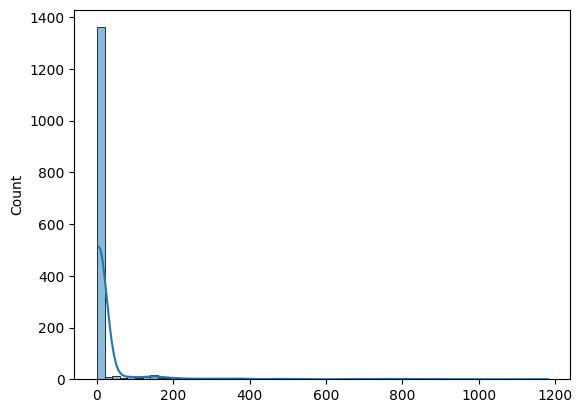

In [18]:
sns.histplot(data=degrees,kde = True,bins=np.histogram_bin_edges(degrees,50,range = (0,1000)))

# degree_centrality

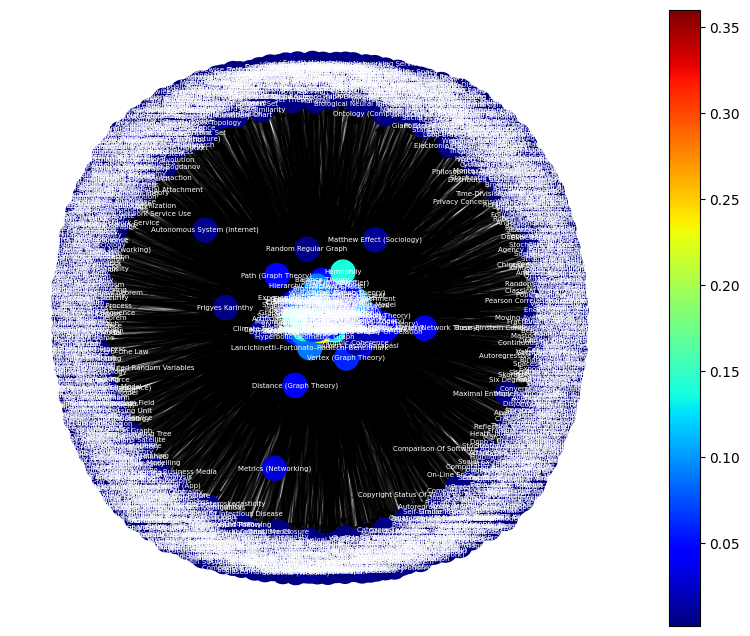

In [19]:
#the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=8375,k=0.2)
# color of nodes
color = list(dict(nx.degree_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white',
                        font_size = 5, 
                        ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

# - Closeness Centrality

In [26]:
nx.closeness_centrality(g)

{'Complex Network': 0.004731144889368144,
 'Adjacency List': 0.004894287816587734,
 'Adjacency Matrix': 0.0050950791116272315,
 'Agent-Based Model': 0.004516092848942319,
 'Albert-László Barabási': 0.0036128742791538553,
 'Artificial Neural Network': 0.004823011780423835,
 'Assortativity': 0.004435448333782635,
 'Autonomous System (Internet)': 0.003144115274580095,
 'Balance Theory': 0.004475407327780676,
 'Barabási–Albert Model': 0.004495658039671086,
 'Bianconi–Barabási Model': 0.004435448333782635,
 'Biological Network': 0.004455338236624709,
 'Biology': 0.0038962369677149416,
 'Bipartite Graph': 0.00504335242013863,
 'Blockmodeling': 0.004657127204058029,
 'Boolean Network': 0.004455338236624709,
 'Branching Process': 0.0031641414865200956,
 'Centrality': 0.004708722401740806,
 'Climate': 0.0034025357081072264,
 'Climate Networks': 0.00304767002075862,
 'Clique (Graph Theory)': 0.00484653866715761,
 'Clustering Coefficient': 0.004578527312291751,
 'Combinatorial Optimization': 0.00

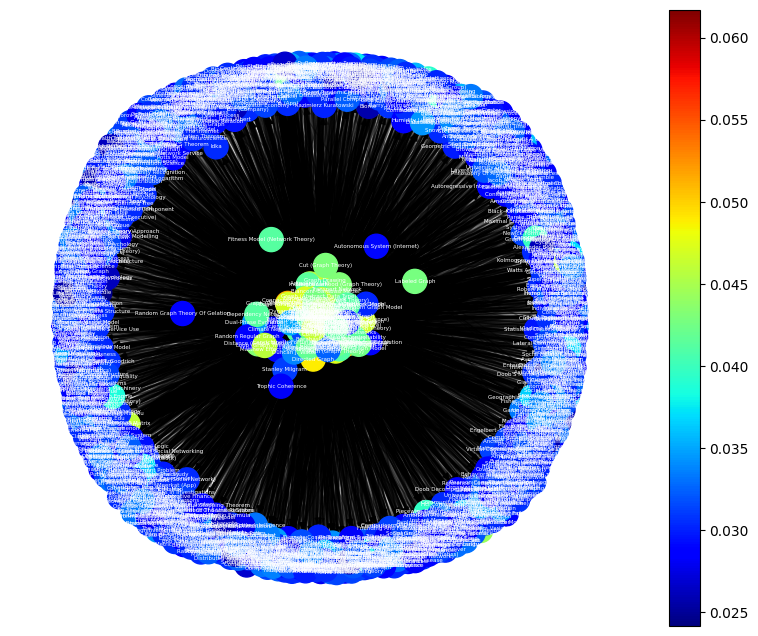

In [27]:

# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

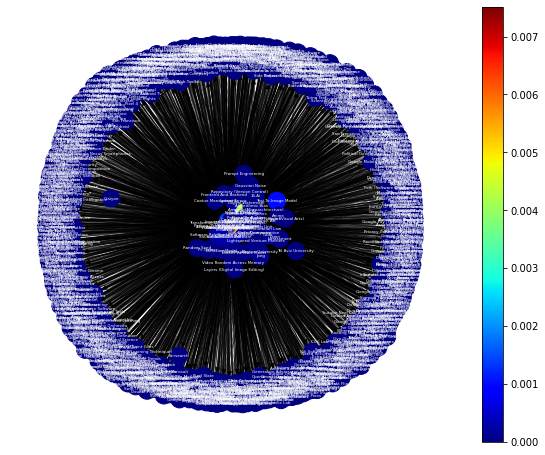

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

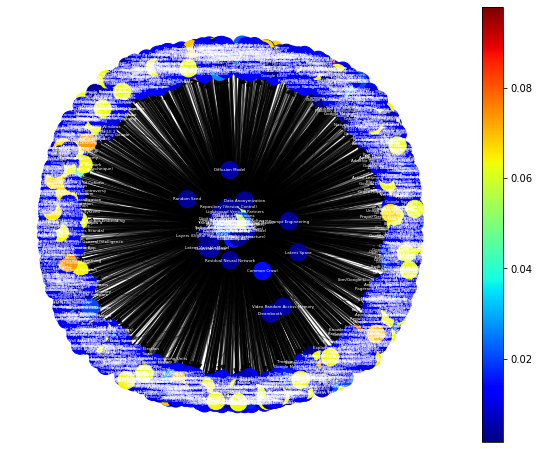

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
bc = pd.Series(nx.betweenness_centrality(subgraf_g))
dc = pd.Series(nx.degree_centrality(subgraf_g))
ec = pd.Series(nx.eigenvector_centrality(subgraf_g))
cc = pd.Series(nx.closeness_centrality(subgraf_g))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.0,0.002244,0.012537,0.007779
1,0.0,0.002244,0.012537,0.007779
2,0.0,0.002244,0.012537,0.007779
3,0.0,0.002244,0.012537,0.007779
4,0.0,0.002244,0.012537,0.007779


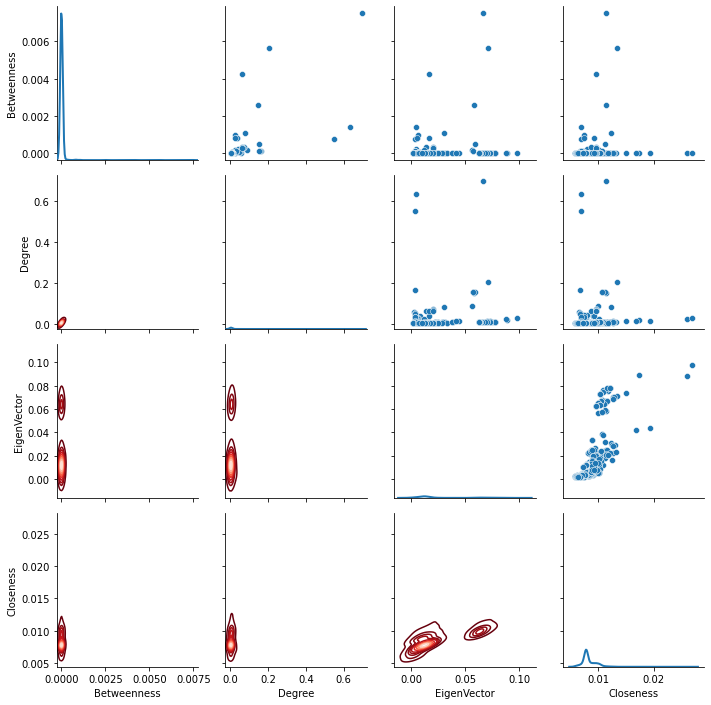

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)


plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [ ]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(subgraf_g).items()])

{3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
import matplotlib.patches as mpatches

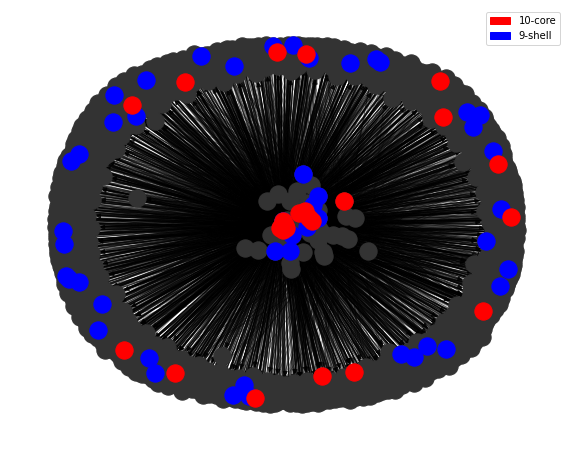

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g2_core_9 = nx.k_shell(subgraf_g, 9)
g2_core_10 = nx.k_core(subgraf_g, 10)

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g2_core_9,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g2_core_10,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='10-core')
blue_patch = mpatches.Patch(color='blue', label='9-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

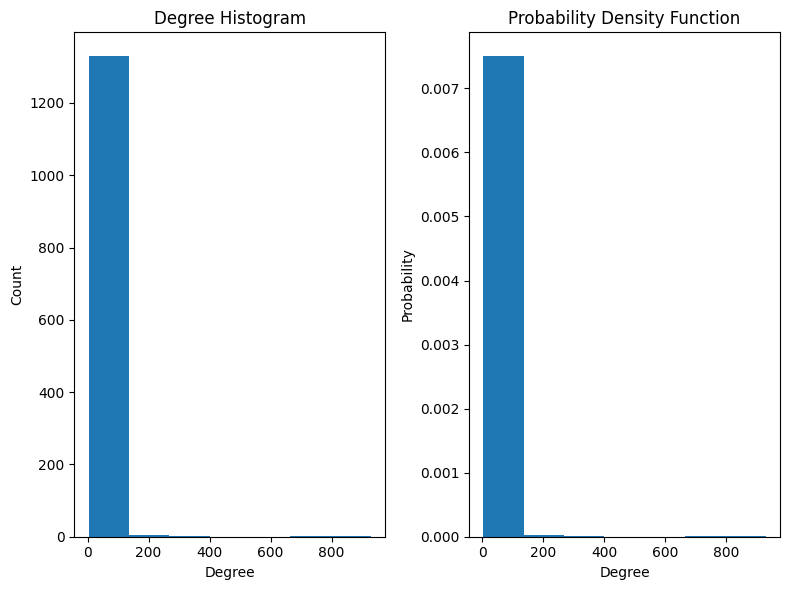

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in subgraf_g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

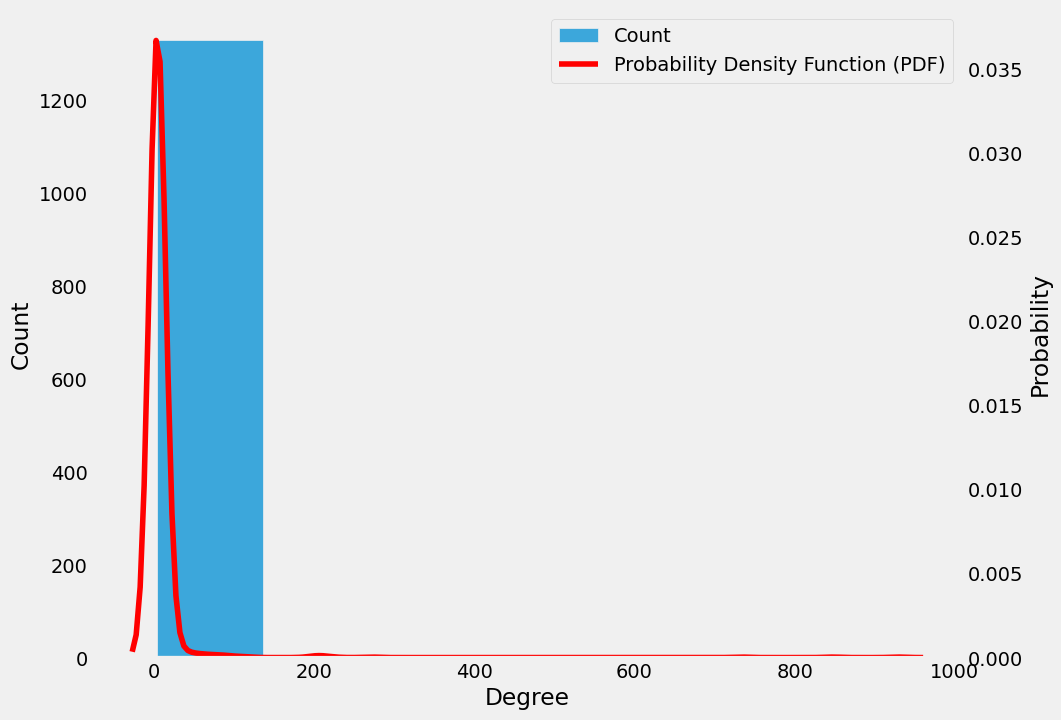

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

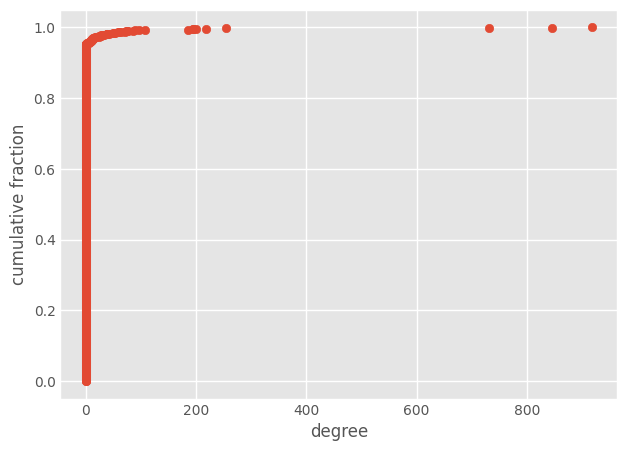

In [ ]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")
     

#
# insighs
# cdf(1) - almore 40% of vertices has degree 1
# cdf(2) P(degree <= 2) - 50% of vertices has at least degree 2 or less
# cdf(6) P(degree <= 6) - more than 95% of vertices has at least degree 6 or less
ecdf_degree(subgraf_g)